In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# PRE PROCESING

## Upload data

In [2]:
data = pd.read_csv(r'user_knowledge_clf.csv')
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High
399,0.85,0.82,0.66,0.83,0.83,High
400,0.56,0.60,0.77,0.13,0.32,Low
401,0.66,0.68,0.81,0.57,0.57,Middle


In [3]:
data.rename(columns={' UNS':'UNS'},inplace=True)

## Describe all columns

In [4]:
data.describe(include='all')

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403
unique,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,Low
freq,NaN,NaN,NaN,NaN,NaN,129
mean,0.353141,0.355940,0.457655,0.431342,0.456360,NaN
std,0.212018,0.215531,0.246684,0.257545,0.266775,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.200000,0.200000,0.265000,0.250000,0.250000,NaN
50%,0.300000,0.300000,0.440000,0.330000,0.400000,NaN
75%,0.480000,0.510000,0.680000,0.650000,0.660000,NaN


## Look data types

In [5]:
data.dtypes

STG    float64
SCG    float64
STR    float64
LPR    float64
PEG    float64
UNS     object
dtype: object

## Look how many unique values of our dependent 

In [6]:
data['UNS'].unique(),"\t",data['UNS'].nunique()

(array(['very_low', 'High', 'Low', 'Middle', 'Very Low'], dtype=object),
 '\t',
 5)

In [7]:
data['UNS'].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [8]:
data['UNS']= np.where(data['UNS']=='very_low','Very Low',data['UNS'])

In [9]:
data['UNS'].value_counts()

Low         129
Middle      122
High        102
Very Low     50
Name: UNS, dtype: int64

## There are 4 unique values of dependent, that's why we transform with LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
data['UNS']=le.fit_transform(data['UNS'])
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,0
399,0.85,0.82,0.66,0.83,0.83,0
400,0.56,0.60,0.77,0.13,0.32,1
401,0.66,0.68,0.81,0.57,0.57,2


## Look if there is missing value

In [13]:
data.isnull().sum()

STG    0
SCG    0
STR    0
LPR    0
PEG    0
UNS    0
dtype: int64

## Find out if there is Outlier

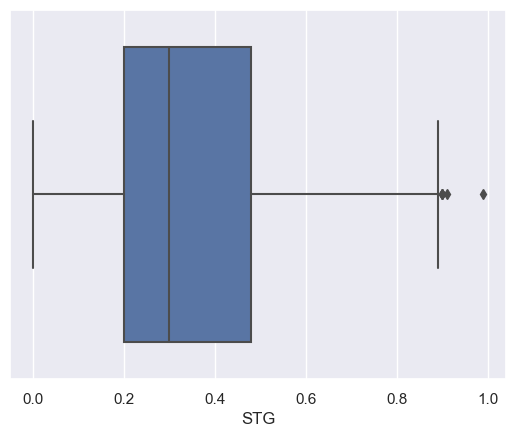

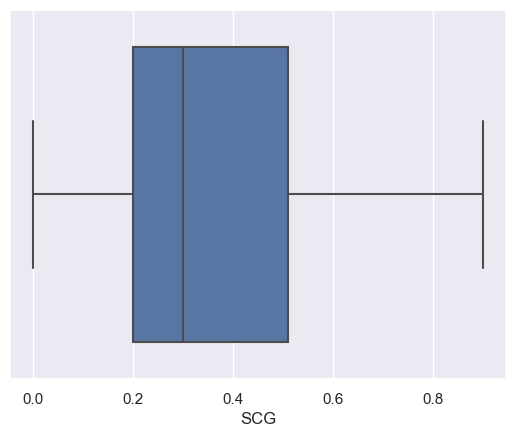

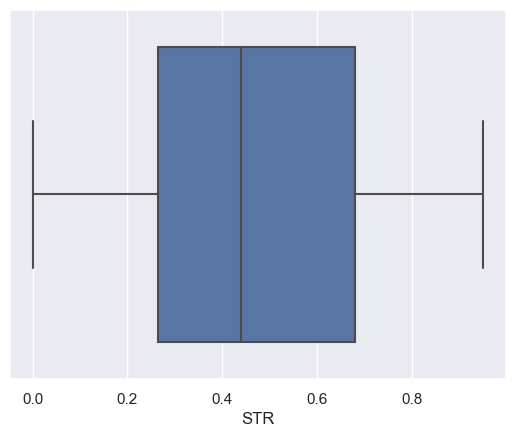

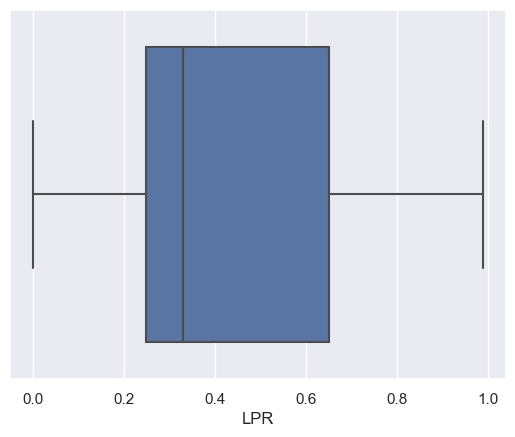

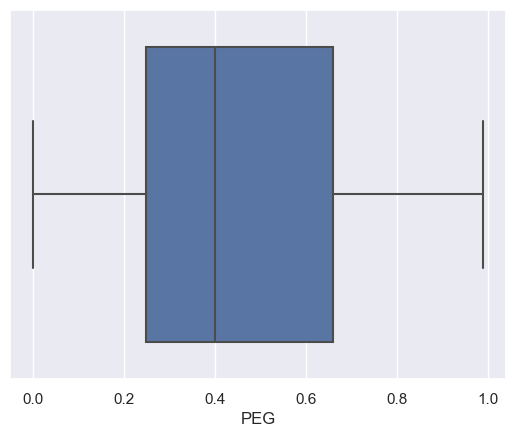

In [14]:
for i in data[['STG','SCG','STR','LPR','PEG']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Outlier treatment

In [15]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [16]:
for i in data[['STG']]:
    data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])

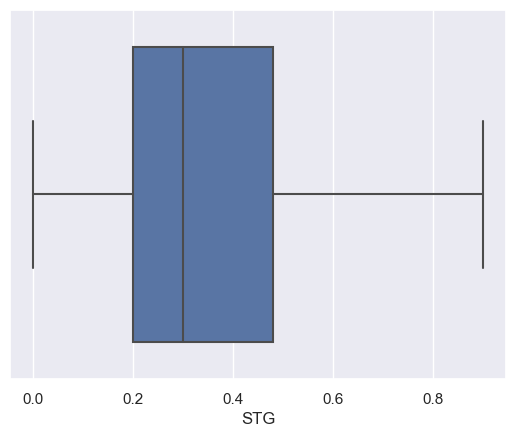

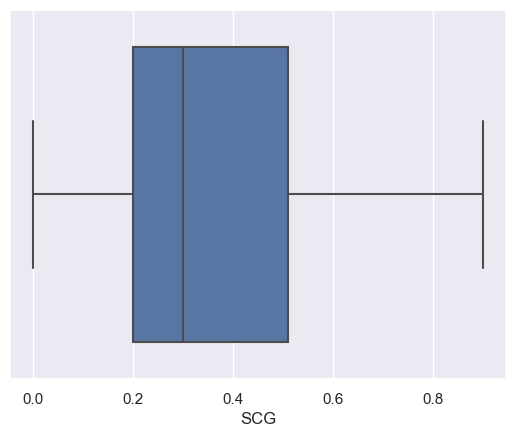

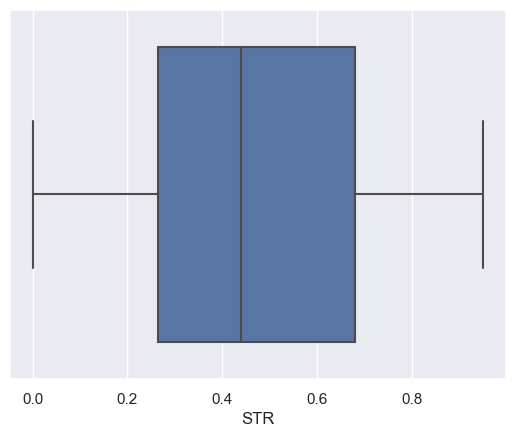

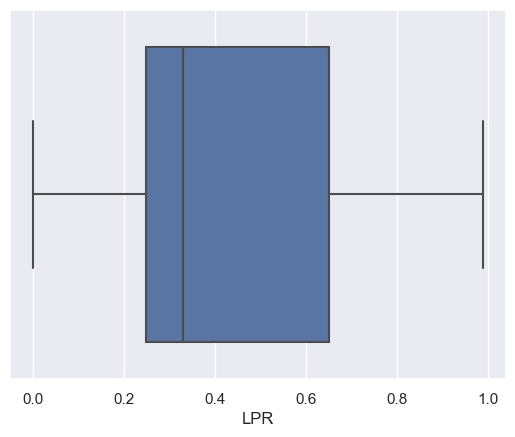

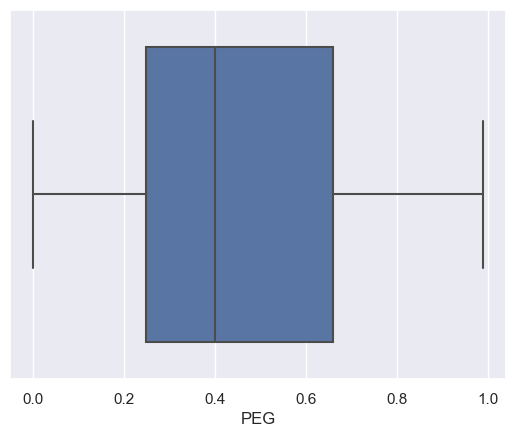

In [17]:
for i in data[['STG','SCG','STR','LPR','PEG']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

## Use variance_infilation_factor to measure multicollinearity beetwen the independent variables

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vari = data[['STG','SCG','STR','LPR','PEG',]]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vari.values,i) for i in range(vari.shape[1])]
vif['Feature'] = vari.columns
vif

,VIF,Feature
0,3.474076,STG
1,3.634459,SCG
2,3.782278,STR
3,3.417883,LPR
4,3.993286,PEG


## Look correlation

In [19]:
data.corr()['UNS']

STG   -0.145350
SCG   -0.183638
STR   -0.118960
LPR   -0.326381
PEG   -0.587623
UNS    1.000000
Name: UNS, dtype: float64

## Data columns

In [20]:
data.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')

# MODELLING

## Inputs and Output

In [21]:
inputs =data[['STG', 'SCG', 'STR', 'LPR', 'PEG']]

output =data['UNS']

## Train test split

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(inputs,output,test_size=0.3,random_state=42)

## Default model

## Create function to measure accuracy

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score


def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print('Model Performance')
    print('Accuracy is', accuracy)
    
    return accuracy

## Fit our model

In [24]:
from sklearn import svm

In [25]:
base_model = svm.SVC(probability=True)
base_model.fit(X_train, y_train)

SVC(probability=True)

## Look our Default model's performance

In [26]:
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy is 90.9090909090909


## Optimized model

## Create function to select best estimators

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
kernel = ['poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto'] 
C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [29]:
svc_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, n_jobs = -1)
svc_random.fit(X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


/Users/ulvigarakhanli/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 42 is smaller than n_iter=100. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=1)

## Look best estimators

In [30]:
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 100}

## Optimized model performance

In [31]:
optimized_model = svc_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Accuracy is 94.21487603305785
